In [1]:
from datasets import load_dataset
import random

random.seed(42)

ds = load_dataset("clarin-knext/fiqa-pl", "corpus")
n = 1000
ds_sample = random.sample(ds['corpus']['text'], n)

/home/miklimek/Studies/NLP/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_sample[:3]

['Jest na swoich serwerach, co oznacza, że \u200b\u200bjest dostępny przez Internet. A dlaczego martwisz się o odkurzanie policyjnych tablic rejestracyjnych? Boisz się, że wyczyszczą ci talerz? I dlaczego bardziej boisz się zhakowania DMV? Jeśli DMV zostanie zhakowany, nie będzie miał dostępu do informacji o Twojej karcie kredytowej pod najlepszym numerem ubezpieczenia społecznego.',
 'Ślub to wyjątkowa okazja w życiu każdego człowieka. Nie ma innego najlepszego sposobu ubierania się na ślub niż lniana kamizelka na ślub. Zachowaj spokój i chłód na swoim weselu i zaskocz gościa i swojego partnera tym, aby nie zapomnieć o wyglądzie z mnóstwem kolorów do wyboru na lnianą kamizelkę na wesele.',
 'Zobacz mój komentarz, aby zapoznać się z dyskusją na temat tego, dlaczego można wybrać identyczny fundusz zamiast ETF. Co do tego, dlaczego w tym przypadku ktoś miałby wybrać fundusz o wyższych kosztach... Wersja funduszu Admiral Shares (VFIAX) ma taki sam wskaźnik kosztów jak ETF, ale minimalna i

In [5]:
! python -m spacy download pl_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.7/573.7 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')


In [6]:
import spacy

nlp = spacy.load("pl_core_news_lg")

In [21]:
test_text = "Wczoraj w Krakowie miało miejsce spotkanie prezydentów Polski i Stanów Zjednoczonych?"

In [25]:
def find_potential_ners(nlp, text):
    potential_ners = []
    text_nlp = nlp(text)
    sentences = list(text_nlp.sents)
    for sentence in sentences:
        lemmas = [token.lemma_ for token in sentence]
        for lemma in lemmas[1:]:
            if lemma[0].isupper():
                potential_ners.append(lemma)

    return potential_ners

find_potential_ners(nlp, test_text)

['Kraków', 'Polska', 'Stany', 'Zjednoczone']

In [40]:
from collections import Counter

all_found_ners = []

for text in ds_sample:
    all_found_ners.extend(find_potential_ners(nlp, text))

print(f"total: {len(all_found_ners)}\n\n")

freqs = Counter(all_found_ners)
for phrase, num in freqs.most_common(50):
    print(f"{phrase}: {num}")


total: 3825


USA: 103
Twój: 57
ETF: 57
IRA: 52
Stany: 41
Roth: 39
IRS: 37
Ciebie: 36
Zjednoczone: 33
Trump: 30
B: 29
Kalifornia: 29
Indie: 27
GBP: 24
BCE: 24
Google: 23
Massachusetts: 23
Amazon: 20
LTA: 20
A: 19
K: 18
Twojej: 18
Twojego: 18
LLC: 18
IV: 17
Apple: 16
Brytania: 15
HSA: 15
Corp: 14
Internet: 13
Ameryka: 13
C: 13
Wielki: 13
API: 13
S: 13
SWIFT: 13
HST: 13
Vanguard: 12
Twoich: 12
GST: 12
Facebook: 11
S&P: 11
PM: 11
Najlepsze: 11
ISA: 11
CPA: 10
P: 10
S&P500: 10
IT: 10
Kanada: 10


In [43]:
def find_spacy_ners(nlp, text):
    text_nlp = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in text_nlp])
    lemma_text_nlp = nlp(lemmatized_text)
    ners = lemma_text_nlp.ents
    return list(ners)

spacy_test_ners = find_spacy_ners(nlp, test_text)
for ner in spacy_test_ners:
    print(f"{ner.text} - {ner.label_}")

Kraków - placeName
Polska - placeName
Stany Zjednoczone - placeName


In [35]:
ner = nlp.get_pipe("ner")
entity_labels = ner.labels
print(entity_labels)

('date', 'geogName', 'orgName', 'persName', 'placeName', 'time')


In [44]:
all_found_spacy_ners = []

for text in ds_sample:
    all_found_spacy_ners.extend(find_spacy_ners(nlp, text))

print(f"total: {len(all_found_spacy_ners)}")

total: 2391


In [48]:
counts = {}

for entity_type in entity_labels:
    found_of_type = [ner.text for ner in all_found_spacy_ners if ner.label_ == entity_type]
    counts[entity_type] = len(found_of_type)
    freqs = Counter(found_of_type)
    print(f"\n_______ {entity_type} _______")
    print(f"      total: {counts[entity_type]}\n")
    for phrase, num in freqs.most_common(10):
        print(f"{phrase}: {num}")



_______ date _______
      total: 196

2007 rok: 6
2012 rok: 6
2013 rok: 5
2014 rok: 5
rok 80 .: 5
15 kwiecień: 5
2008 rok: 4
2013: 4
2000 rok: 4
2009 rok: 4

_______ geogName _______
      total: 55

europejski: 6
Europa: 3
Wall Street: 3
Ziemia: 3
BillMeLater: 2
Alaska: 2
Reddit: 2
FDIC: 2
Forex: 2
Texas Hold ' Em: 1

_______ orgName _______
      total: 933

IRS: 41
IRA: 39
ETF: 28
Google: 21
Amazon: 20
LTA: 20
Apple: 17
Trump: 17
Roth IRA: 12
Facebook: 12

_______ persName _______
      total: 538

Roth: 25
Trump: 9
Buffett: 8
Romney: 8
Gruber: 7
Obamy: 6
Wal - Mart: 6
Clinton: 5
Obama: 5
giera: 5

_______ placeName _______
      total: 650

USA: 102
amerykański: 57
Stany Zjednoczone: 33
Kalifornia: 30
Indie: 27
Massachusetts: 23
Ameryka: 14
kanadyjski: 12
Stany: 10
Kanada: 10

_______ time _______
      total: 19

65: 6
8 rano: 3
01: 2
4 .: 2
50: 2
12:00 w: 1
godzina .: 1
14 .: 1
00: 1


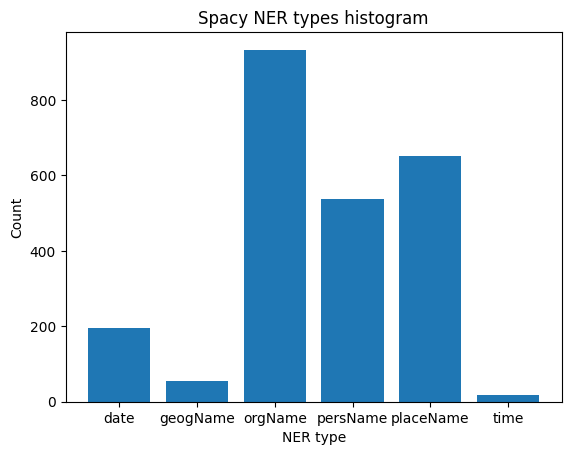

In [53]:
import matplotlib.pyplot as plt

plt.bar(counts.keys(), counts.values())
plt.xlabel('NER type')
plt.ylabel('Count')
plt.title('Spacy NER types histogram')
plt.show()

In [57]:
total_counts = Counter([(phrase.text, phrase.label_) for phrase in all_found_spacy_ners])

for phrase, num in total_counts.most_common(50):
    print(f"{phrase[0]} - {phrase[1]}: {num}")

USA - placeName: 102
amerykański - placeName: 57
IRS - orgName: 41
IRA - orgName: 39
Stany Zjednoczone - placeName: 33
Kalifornia - placeName: 30
ETF - orgName: 28
Indie - placeName: 27
Roth - persName: 25
Massachusetts - placeName: 23
Google - orgName: 21
Amazon - orgName: 20
LTA - orgName: 20
Apple - orgName: 17
Trump - orgName: 17
Ameryka - placeName: 14
Roth IRA - orgName: 12
Facebook - orgName: 12
kanadyjski - placeName: 12
LLC - orgName: 12
BCE - orgName: 12
Uber - orgName: 10
SEC - orgName: 10
Fed - orgName: 10
Stany - placeName: 10
Kanada - placeName: 10
Yelp - orgName: 10
Microsoft - orgName: 9
Wielki Brytania - placeName: 9
Amerykanin - placeName: 9
Trump - persName: 9
HSA - orgName: 8
Buffett - persName: 8
Romney - persName: 8
Vanguard - orgName: 7
Whole Foods - orgName: 7
GBP - orgName: 7
angielski - placeName: 7
Gruber - persName: 7
Oregon - placeName: 7
S - Corp - orgName: 7
Accenture - orgName: 7
FICA - placeName: 6
2007 rok - date: 6
europejski - geogName: 6
Obamy - per

In [67]:
def find_sentences_with_two_ners(nlp, texts, n=10):
    proper_texts = []
    for text in texts:
        text_nlp = nlp(text)
        sentences = list(text_nlp.sents)
        for sentence in sentences:
            ners = find_spacy_ners(nlp, sentence.text)
            if len(set([ner.label_ for ner in ners])) > 1:
                proper_texts.append((sentence.text, ners))

                if len(proper_texts) >= n:
                    return proper_texts
                    
    return proper_texts

In [68]:
multi_ner_text = find_sentences_with_two_ners(nlp, ds_sample, 10)

In [69]:
for text, ners in multi_ner_text:
    print(f"{text} - {ners}")

Wersja funduszu Admiral Shares (VFIAX) ma taki sam wskaźnik kosztów jak ETF, ale minimalna inwestycja wynosi 10 000 USD. - [Admiral Shares, VFIAX]
Oto cytat z Bogleheads Guide to Investing: Fundusze indeksowe osiągają wyniki lepsze niż około 80 procent wszystkich aktywnie zarządzanych funduszy w długim okresie czasu. - [Bogleheads Guide, Investing]
Programy do rozważenia (lista nie jest wyczerpująca): * University of Michigan: Inżynieria finansowa * Carnegie Mellon: Finanse obliczeniowe * NYU: Finanse matematyczne (chyba) * U of Toronto: Finanse matematyczne * Berkeley: Inżynieria finansowa * Columbia: Inżynieria finansowa Niektóre uniwersytety nazywają to również finansami ilościowymi. - [University of Michigan, Toronto, Berkeley, Columbia]
Zakupy w Safeway, sklepie Albertsona lub podobnym są brzydkie, niewygodne, zimne i śmierdzące. - [Safeway, Albertsona]
> Co sprawia, że ​​myślisz, że Whole Foods jest w jakikolwiek sposób BARDZIEJ zwodnicza niż Walmart, Publix, Costco itp.? - [Whol

In [71]:
from spacy import displacy

for text, ners in multi_ner_text:
    doc = nlp(text)
    displacy.render(doc, style="ent", jupyter=True)
    print("\n")


## Wnioski i odpowiedzi na pytania

Lepiej działa metoda rozpoznawania NER z wykorzystaniem Spacy – ekstrakcja takich wyrazów tylko na podstawie dużych liter ma wiele wad. Oprócz wyrazów, które mogą być traktowane jako pewien rodzaj NER (np. USA, Roth, Kalifornia, Google), metoda opierająca się na dużych literach znajduje również słowa, które encjami na pewno nie są – np. słowa, które w listach i mailach grzecznościowo piszemy z wielkiej litery (np. Ciebie, Twój Twoich), skróty (IT, ETF), czy nawet pojedyncze litery (B, A, K). Niektóre encje są rozdzielone (np. Stany i Zjednoczone, Wielki i Brytania). Dodatkowo nie uwzględniamy encji, które mogą znaleźć się na początku zdania.

Metoda oparta na NER działa zdecydowanie lepie i eliminuje wymienione wcześniej wady – „Stany Zjednoczone” traktowane jako całość, brak zwrotów grzecznościowych. Dodatkowo przypisuje również do każdego zwrotu odpowiednie kategorie. Za wady można uznać pewną niedokładność (np. „65” rozpoznawane jako czas) oraz ograniczoną ilość kategorii (dla języka polskiego 6). Dodatkowo Spacy nie jest w stanie połączyć sformułowań o takim samym znaczeniu (np. USA i Stany Zjednoczone).
Na podstawie najczęstszych dopasowani najlepiej wypadającymi kategoriami są `placeName`, `date` `orgName`. Zazwyczaj poprawnie dopasowywane są również kategorie `geogName`, `persName`, choć zdarzają się pojedyncze pomyłki („Reddit” jako nazwa geograficzna, czy „Wal – Mart” jako osoba). Zdecydowanie najgorzej Spacy radzi sobie z dopasowywaniem czasu (`time`), gdzie wyłapuje pojedyncze cyfry (np. „65” czy słowa „godzina”).

Do rozpoznawania wyrażeń o takim samym znaczeniu wykorzystać można byłoby rozbudowany słownik synonimów (stworzony w podobny sposób jak dla ElasticSearch). Z takim zagadnieniem mógłby sobie również dobrze poradzić model językowy, który posiadałby szerszą wiedzę o świecie.

Zagadnieniem, w którym NER mógłby być cennym udogodnieniem, jest na pewno przeglądanie dokumentów historycznych. Dzięki NER możliwe byłoby np. łatwe znalezienie w nich dat, miejscowości i nazwisk, co mogłoby pomóc np. w śledzeniu tras przemarszu wojsk. Dodatkowo dzięki zastosowaniu NER w innych językach możliwe byłoby dość łatwe określenie przydatności dokumentów w określonych badaniah (np. wykorzystując NER w do języka rosyjskiego sprawdzamy, czy w danym tekście po rosyjsku występują interesujące nas osoby czy miejsca, a jeśli takie znajdziemy zajmujemy się tłumaczeniem).


In [79]:
archive_text = "W. Milodanowicz podaje: 25 listopada 1914 roku 127. Pułk Piechoty Putywelskiej \
                wraz z 2. dywizjonem (bez 6. baterii) 32. Brygady Artylerii poruszał się główną szosą Tarnów - Kraków. \
                Dzień był słoneczny. Na południe od Bochni wyraźnie widoczne były wzgórza, stanowiące oczywistą pozycję przeciwnika. \
                Z tych wzgórz nasza kolumna była, rzecz jasna, widoczna jak na dłoni, \
                co wywoływało nieprzyjemne uczucie możliwości znalezienia się pod ogniem w marszu. \
                Niemniej jednak, całkiem pomyślnie minęliśmy wieś Rzezawa i zrównaliśmy się z miejscowością Krzeszów. \
                Dowódca pułku, pułkownik Chrosticki, zażądał, abyśmy podjechali bliżej do przeciwnika."

doc = nlp(archive_text)
displacy.render(doc, style="ent", jupyter=True)